<center> 

# Customer Churn EDA <br> 

</center>

In [1]:
# Installing dependencies via requirements.txt 
#%pip install -r ../requirements.txt 


In [1]:
# Importing libraries
import warnings 
warnings.filterwarnings('ignore') 

import sys 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from pathlib import Path 

# Getting the project root 
project_root = Path().resolve().parent 
sys.path.append(str(project_root)) 

# src/utils.py 
from src.utils import data_path, visuals_path, save_data, group_churn 



In [2]:
# Setting random_state for reproducibility 
random_state = 42 
np.random.seed(random_state)


In [3]:
# Plotting settings 
sns.set_style('whitegrid') 
plt.rcParams['figure.figsize'] = (10,6) 


In [4]:
# Loading data 
telco_data_path = data_path / "telco_churn_data.csv" 

telco_data = pd.read_csv(telco_data_path) 
telco_data.head() 
print("\nData Info: ") 
print(telco_data.info()) 



Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-nu

In [5]:
data = telco_data.copy() 

# Data checks 
print("\nMissing values: ") 
print(data.isna().sum()) 

# Checking if there are duplicate customerID values 
print("\nAll unique customerID --> ", data['customerID'].nunique() == len(data)) 



Missing values: 
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

All unique customerID -->  True


In [6]:
# Converting TotalCharges to numeric 
if data['TotalCharges'].dtype == 'object': 
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce') 
    print("\nTotalCharges NA count (After numeric conversion): ", data['TotalCharges'].isna().sum())

# Checking if any rows have tenure == 0 & totalcharges == NaN 
# Possible for new customers 
new_cust = (data['tenure'] == 0) & (data['TotalCharges'].isna()) 
print("\nRows with tenure == 0 & TotalCharges == NaN : ", new_cust.sum()) 



TotalCharges NA count (After numeric conversion):  11

Rows with tenure == 0 & TotalCharges == NaN :  11


In [7]:
# Changing TotalCharges to 0 if tenure==0 (Assumed it is a new customer) 
# If any TotalCharges==NaN remain these will be handled later 
data.loc[(data['tenure']==0) & (data['TotalCharges'].isna()), 'TotalCharges'] = 0.0 
print("Remaining NaN TotalCharges values after fix: ", data['TotalCharges'].isna().sum()) 


Remaining NaN TotalCharges values after fix:  0


In [8]:
# Encoding the SeniorCitizen column to match the other columns (converting 0/1 to labels) 
data['SeniorCitizen'] = data['SeniorCitizen'].map({0:'No', 1:'Yes'}) 
print(data['SeniorCitizen'].head())


0    No
1    No
2    No
3    No
4    No
Name: SeniorCitizen, dtype: object


In [9]:
# Saving cleaned data to Data/ folder 
#save_data(data, "cleaned_raw_data") 


<center> 

### Exploratory Data Analysis (EDA) <br> 
Looking at group churn rates, population comparisons, visualizations, and interpretations 

</center>

In [10]:
# Finding baseline churn rate (Total churn rate) 
print("Baseline churn:") 
print(data['Churn'].value_counts(normalize=True)) 


Baseline churn:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


<center> 

**Baseline Churn Rate: 26.54%** 

</center> 

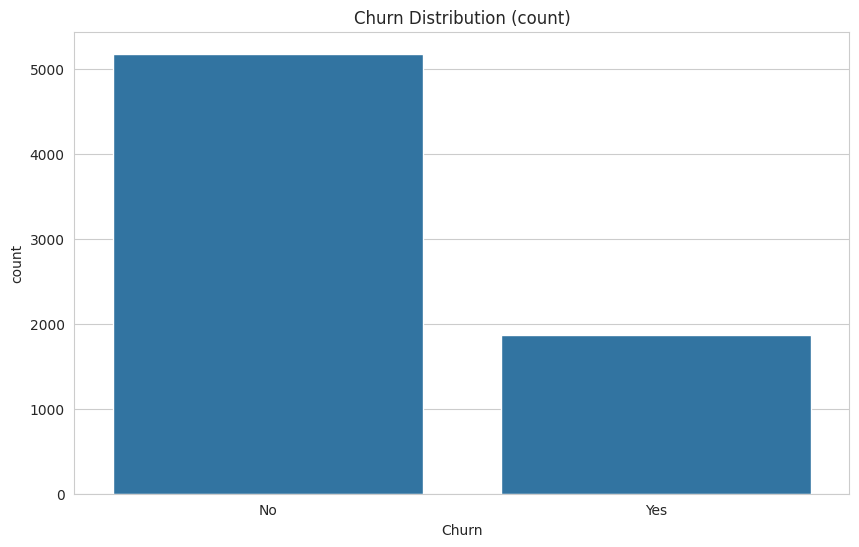

In [11]:
# Churn distribution 
ax = sns.countplot(x='Churn', data=data) 
ax.set_title("Churn Distribution (count)") 
#plt.savefig(visuals_path / 'churn_distribution.png', dpi=150, bbox_inches='tight') 
plt.show() 


In [12]:
# Calculating cross-tabs for seniorcitizen 
# Adding calculations to separate Senior/Non-Senior 
senior_crosstab = pd.crosstab(data['SeniorCitizen'], data['Churn'], normalize=True, margins=True) 
senior_crosstab = senior_crosstab.rename(columns={'No':'churn_no_pct', 'Yes':'churn_yes_pct'})
print("Senior Citizen cross-tabulation: ") 
senior_crosstab

Senior Citizen cross-tabulation: 


Churn,churn_no_pct,churn_yes_pct,All
SeniorCitizen,,,
No,0.640068,0.197785,0.837853
Yes,0.094562,0.067585,0.162147
All,0.734630,0.265370,1.000000


In [13]:
# Calculating spearate percentages for senior/non-senior 
senior_churn = senior_crosstab.loc['Yes','churn_yes_pct'] if 'Yes' in senior_crosstab.index else None 
non_senior_churn = senior_crosstab.loc['No','churn_yes_pct'] 
print("Senior (in-group) Churn (Yes): ", senior_churn) 
print("\nNon-Senior (in-group) Churn (Yes): ", non_senior_churn) 



Senior (in-group) Churn (Yes):  0.06758483600738321

Non-Senior (in-group) Churn (Yes):  0.19778503478631265


**Note:** <br>
Senior citizens had a population churn rate of 6.76%, however, looking at in-group rates senior citizens had a much higher churn rate of 41.68% compared to non-senior citizens in-group churn rate of 23.61%.  
Despite senior citizens having the higher in-group churn rate, non-senior citizens still had a much higher population churn share (19.78%). 

                group_churn  population_share  population_churn_share
Contract                                                             
Month-to-month     0.427097          0.550192                0.234985
One year           0.112695          0.209144                0.023570
Two year           0.028319          0.240664                0.006815


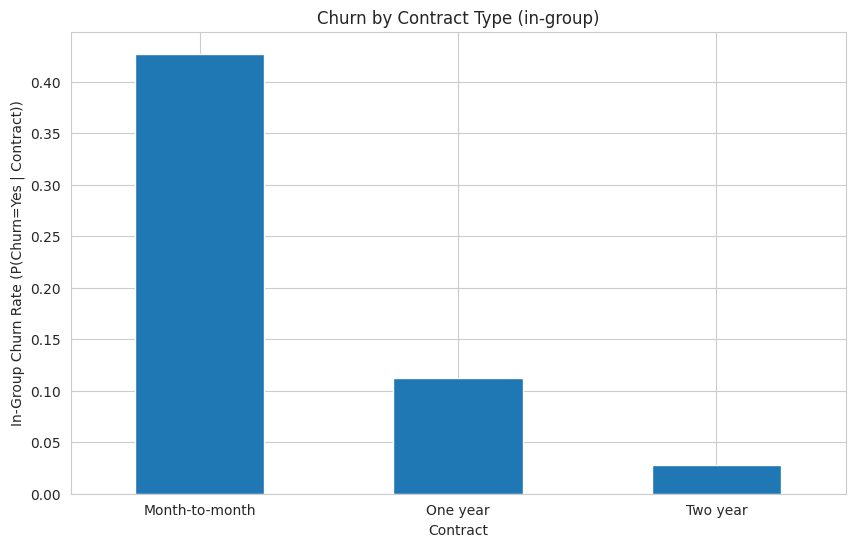

In [14]:
# Contract type and churn 
contract_stats = group_churn(data, 'Contract') 
print(contract_stats[['group_churn','population_share','population_churn_share']]) 
# Bar plot 
ax = contract_stats['group_churn'].plot(kind='bar') 
ax.set_ylabel('In-Group Churn Rate (P(Churn=Yes | Contract))') 
ax.set_title('Churn by Contract Type (in-group)') 
plt.xticks(rotation=0) 
# Saving figure 
#plt.savefig(visuals_path / 'churn_by_contract.png', dpi=150, bbox_inches='tight') 
plt.show() 


                 group_churn  population_share  population_churn_share
InternetService                                                       
DSL                 0.189591          0.343746                0.065171
Fiber optic         0.418928          0.439585                0.184154
No                  0.074050          0.216669                0.016044


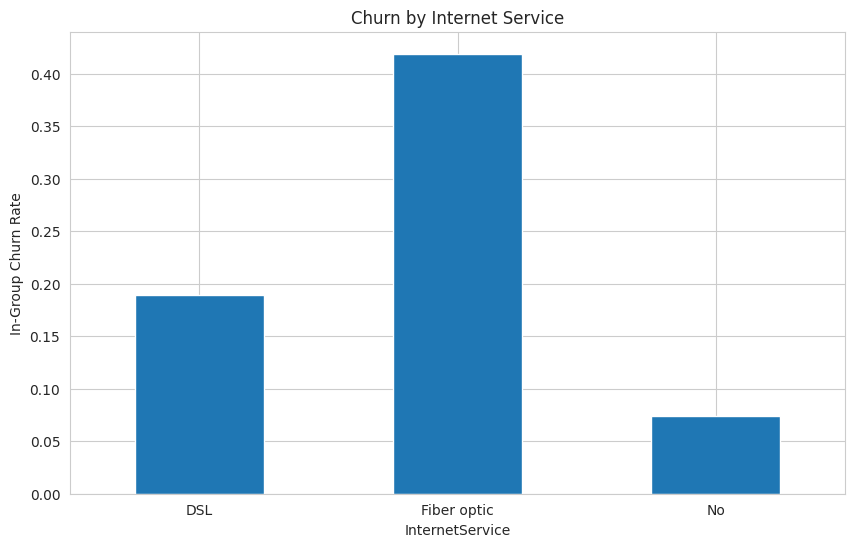

In [15]:
# Internet service and churn 
InternetService_stats = group_churn(data, 'InternetService') 
print(InternetService_stats[['group_churn','population_share','population_churn_share']]) 
# Bar plot 
ax = InternetService_stats['group_churn'].plot(kind='bar') 
ax.set_ylabel('In-Group Churn Rate') 
ax.set_title('Churn by Internet Service') 
plt.xticks(rotation=0) 
# Saving figure 
#plt.savefig(visuals_path / 'churn_by_internet_service.png', dpi=150, bbox_inches='tight') 
plt.show() 


        group_churn  population_share  population_churn_share
gender                                                       
Female     0.269209          0.495244                0.133324
Male       0.261603          0.504756                0.132046


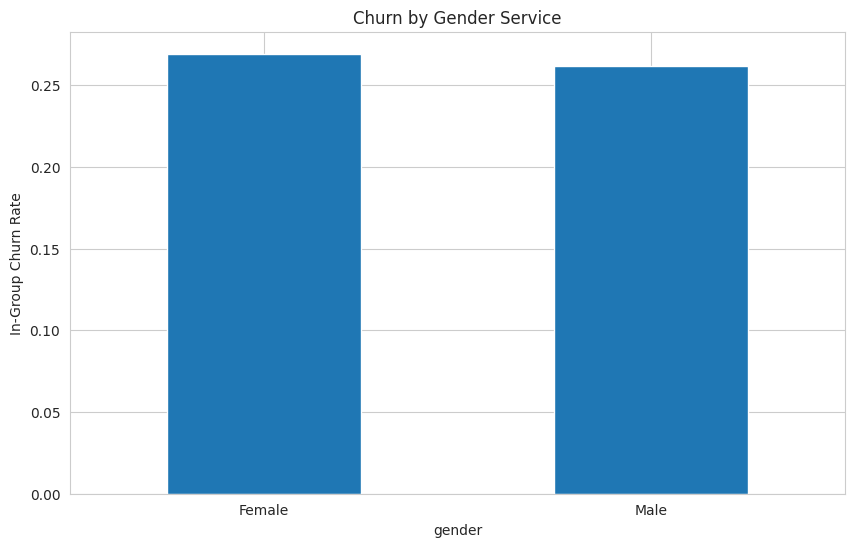

In [16]:
# Gender and churn 
gender_stats = group_churn(data, 'gender') 
print(gender_stats[['group_churn','population_share','population_churn_share']]) 
# Bar plot 
ax = gender_stats['group_churn'].plot(kind='bar') 
ax.set_ylabel('In-Group Churn Rate') 
ax.set_title('Churn by Gender Service') 
plt.xticks(rotation=0) 
# Saving figure 
#plt.savefig(visuals_path / 'churn_by_gender.png', dpi=150, bbox_inches='tight') 
plt.show() 


         group_churn  population_share  population_churn_share
Partner                                                       
No          0.329580          0.516967                0.170382
Yes         0.196649          0.483033                0.094988


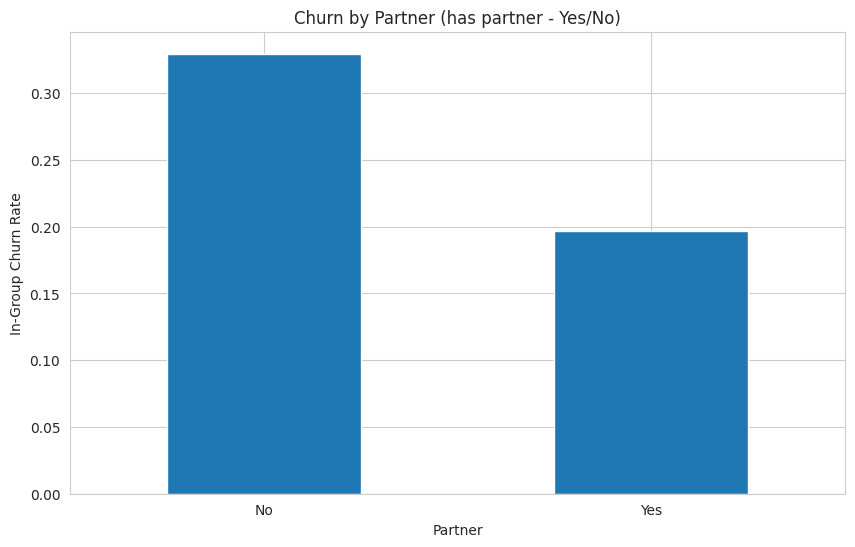

In [17]:
# Partner and churn 
partner_stats = group_churn(data, 'Partner') 
print(partner_stats[['group_churn','population_share','population_churn_share']]) 
# Bar plot 
ax = partner_stats['group_churn'].plot(kind='bar') 
ax.set_ylabel('In-Group Churn Rate') 
ax.set_title('Churn by Partner (has partner - Yes/No)') 
plt.xticks(rotation=0) 
# Saving figure 
#plt.savefig(visuals_path / 'churn_by_partner.png', dpi=150, bbox_inches='tight') 
plt.show() 


            group_churn  population_share  population_churn_share
Dependents                                                       
No             0.312791          0.700412                0.219083
Yes            0.154502          0.299588                0.046287


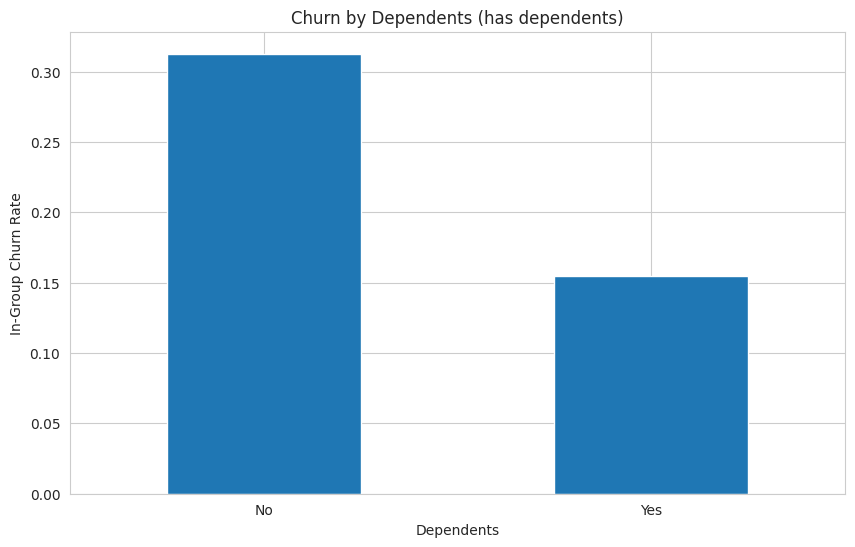

In [18]:
# Dependents and churn 
dependents_stats = group_churn(data, 'Dependents') 
print(dependents_stats[['group_churn','population_share','population_churn_share']]) 
# Bar Plot 
ax = dependents_stats['group_churn'].plot(kind='bar') 
ax.set_ylabel('In-Group Churn Rate') 
ax.set_title('Churn by Dependents (has dependents)') 
plt.xticks(rotation=0) 
# Saving figure 
#plt.savefig(visuals_path / 'churn_by_dependents.png', dpi=150, bbox_inches='tight') 
plt.show()


              group_churn  population_share  population_churn_share
PhoneService                                                       
No               0.249267          0.096834                0.024137
Yes              0.267096          0.903166                0.241232


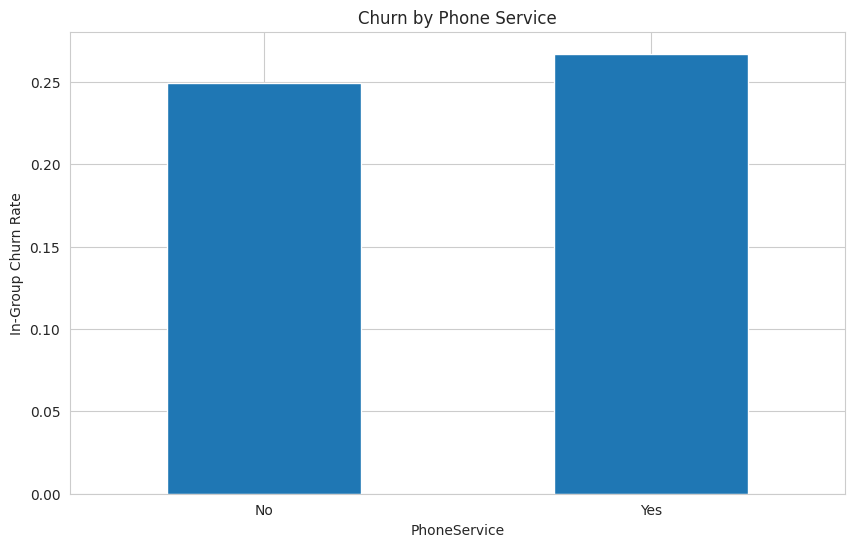

In [19]:
# Phone service and churn 
PhoneService_stats = group_churn(data, 'PhoneService') 
print(PhoneService_stats[['group_churn','population_share','population_churn_share']]) 
# Bar Plot 
ax = PhoneService_stats['group_churn'].plot(kind='bar') 
ax.set_ylabel('In-Group Churn Rate') 
ax.set_title('Churn by Phone Service') 
plt.xticks(rotation=0) 
# Saving figure 
#plt.savefig(visuals_path / 'churn_by_phone_service.png', dpi=150, bbox_inches='tight') 
plt.show()


                  group_churn  population_share  population_churn_share
MultipleLines                                                          
No                   0.250442          0.481329                0.120545
No phone service     0.249267          0.096834                0.024137
Yes                  0.286099          0.421837                0.120687


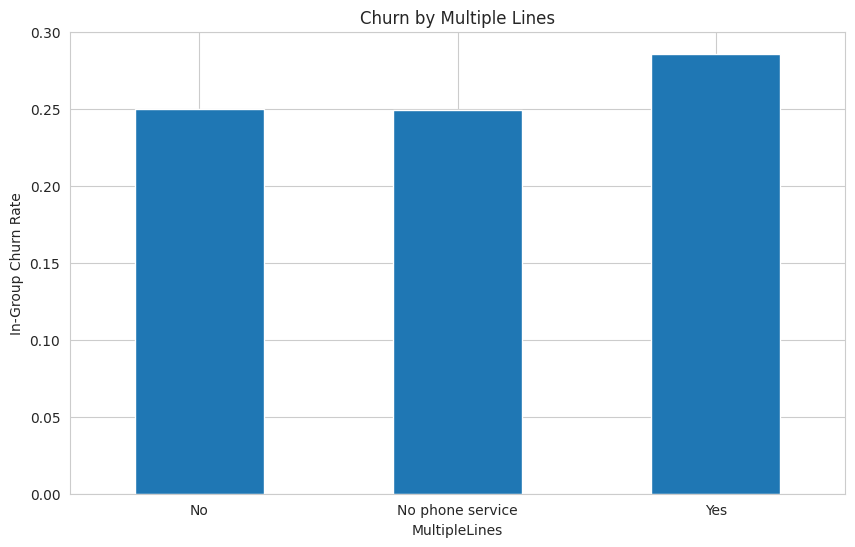

In [20]:
# Multiple lines and churn 
MultipleLines_stats = group_churn(data, 'MultipleLines') 
print(MultipleLines_stats[['group_churn','population_share','population_churn_share']]) 
# Bar Plot 
ax = MultipleLines_stats['group_churn'].plot(kind='bar') 
ax.set_ylabel('In-Group Churn Rate') 
ax.set_title('Churn by Multiple Lines') 
plt.xticks(rotation=0) 
# Saving figure 
#plt.savefig(visuals_path / 'churn_by_multiple_lines.png', dpi=150, bbox_inches='tight') 
plt.show()


                     group_churn  population_share  population_churn_share
OnlineSecurity                                                            
No                      0.417667          0.496663                0.207440
No internet service     0.074050          0.216669                0.016044
Yes                     0.146112          0.286668                0.041886


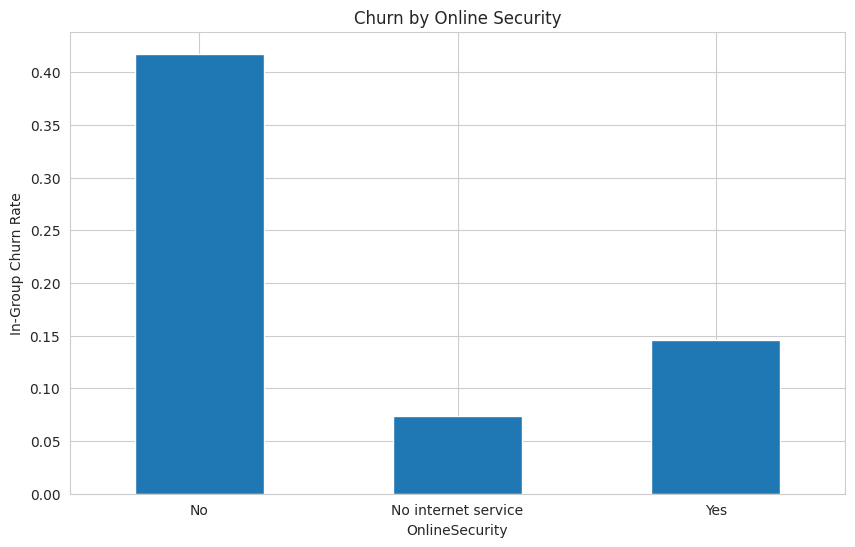

In [21]:
# Online security and churn 
OnlineSecurity_stats = group_churn(data, 'OnlineSecurity') 
print(OnlineSecurity_stats[['group_churn','population_share','population_churn_share']]) 
# Bar Plot 
ax = OnlineSecurity_stats['group_churn'].plot(kind='bar') 
ax.set_ylabel('In-Group Churn Rate') 
ax.set_title('Churn by Online Security') 
plt.xticks(rotation=0) 
# Saving figure 
#plt.savefig(visuals_path / 'churn_by_online_security.png', dpi=150, bbox_inches='tight') 
plt.show()


                     group_churn  population_share  population_churn_share
OnlineBackup                                                              
No                      0.399288          0.438450                0.175067
No internet service     0.074050          0.216669                0.016044
Yes                     0.215315          0.344881                0.074258


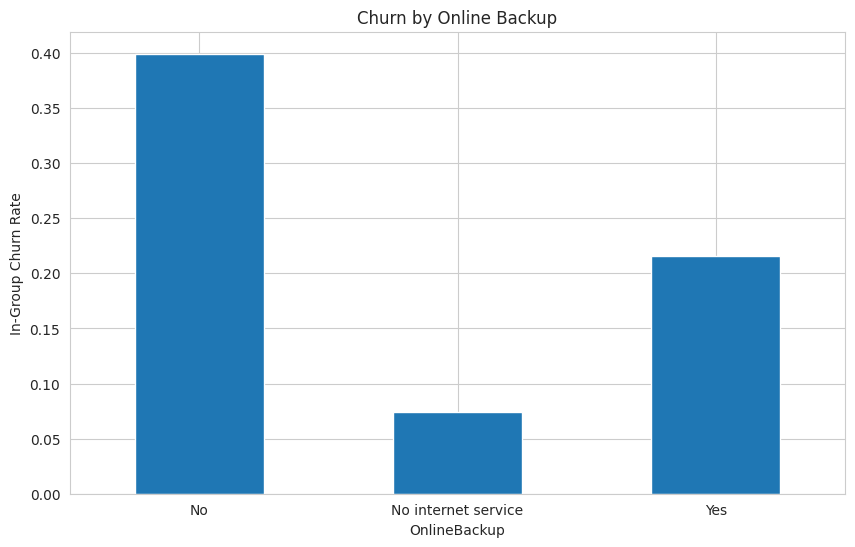

In [22]:
# Online backup and churn 
OnlineBackup_stats = group_churn(data, 'OnlineBackup') 
print(OnlineBackup_stats[['group_churn','population_share','population_churn_share']]) 
# Bar Plot 
ax = OnlineBackup_stats['group_churn'].plot(kind='bar') 
ax.set_ylabel('In-Group Churn Rate') 
ax.set_title('Churn by Online Backup') 
plt.xticks(rotation=0) 
# Saving figure 
#plt.savefig(visuals_path / 'churn_by_online_backup.png', dpi=150, bbox_inches='tight') 
plt.show()


                     group_churn  population_share  population_churn_share
DeviceProtection                                                          
No                      0.391276          0.439443                0.171944
No internet service     0.074050          0.216669                0.016044
Yes                     0.225021          0.343888                0.077382


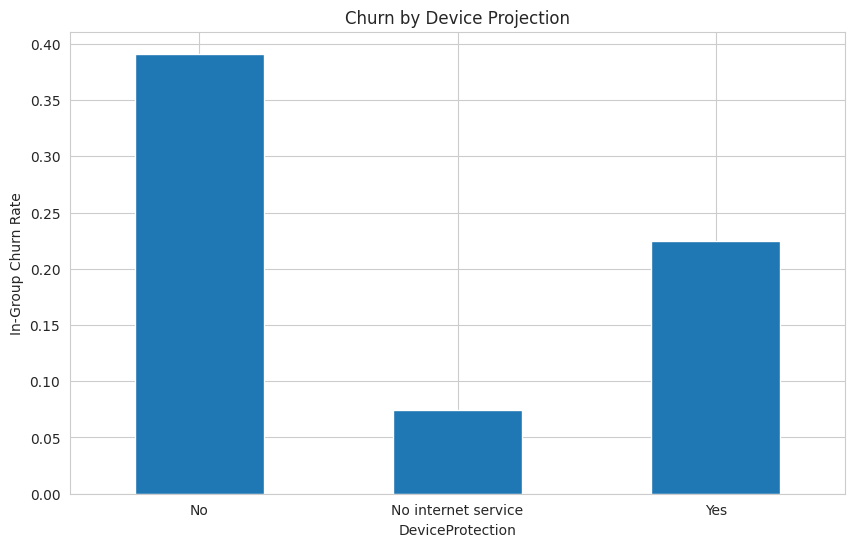

In [23]:
# Device protection and churn 
DeviceProtection_stats = group_churn(data, 'DeviceProtection') 
print(DeviceProtection_stats[['group_churn','population_share','population_churn_share']]) 
# Bar Plot 
ax = DeviceProtection_stats['group_churn'].plot(kind='bar') 
ax.set_ylabel('In-Group Churn Rate') 
ax.set_title('Churn by Device Projection') 
plt.xticks(rotation=0) 
# Saving figure 
#plt.savefig(visuals_path / 'churn_by_device_protection.png', dpi=150, bbox_inches='tight') 
plt.show()


                     group_churn  population_share  population_churn_share
TechSupport                                                               
No                      0.416355          0.493114                0.205310
No internet service     0.074050          0.216669                0.016044
Yes                     0.151663          0.290217                0.044015


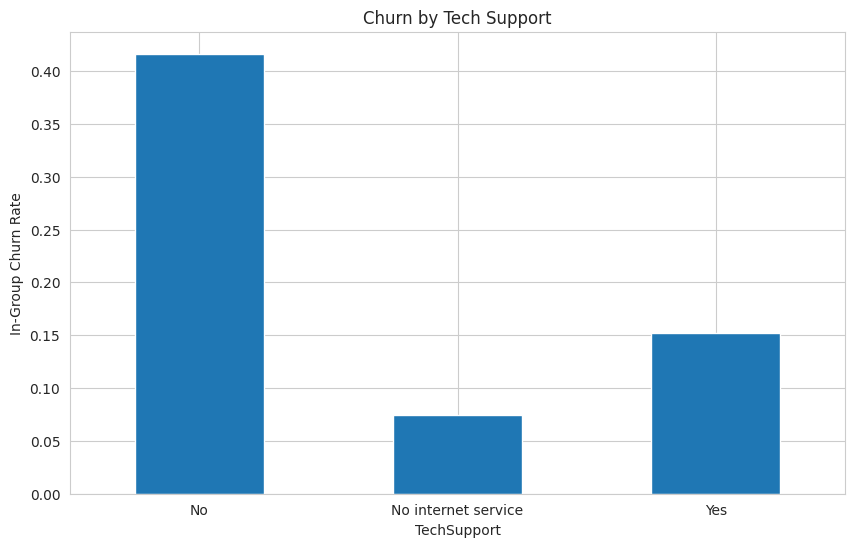

In [24]:
# Tech support and churn 
TechSupport_stats = group_churn(data, 'TechSupport') 
print(TechSupport_stats[['group_churn','population_share','population_churn_share']]) 
# Bar Plot 
ax = TechSupport_stats['group_churn'].plot(kind='bar') 
ax.set_ylabel('In-Group Churn Rate') 
ax.set_title('Churn by Tech Support') 
plt.xticks(rotation=0) 
# Saving figure 
#plt.savefig(visuals_path / 'churn_by_tech_support.png', dpi=150, bbox_inches='tight') 
plt.show()


                     group_churn  population_share  population_churn_share
StreamingTV                                                               
No                      0.335231          0.398978                0.133750
No internet service     0.074050          0.216669                0.016044
Yes                     0.300702          0.384353                0.115576


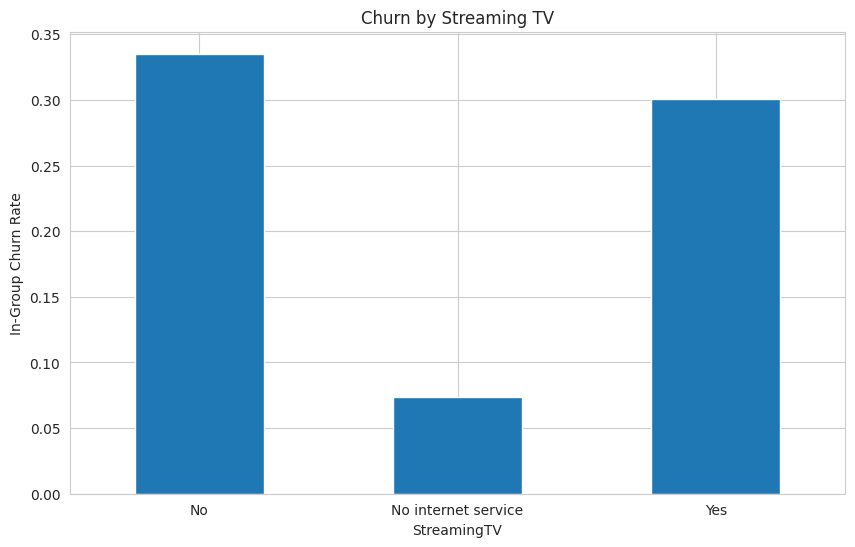

In [25]:
# Streaming TV and churn 
StreamingTV_stats = group_churn(data, 'StreamingTV') 
print(StreamingTV_stats[['group_churn','population_share','population_churn_share']]) 
# Bar Plot 
ax = StreamingTV_stats['group_churn'].plot(kind='bar') 
ax.set_ylabel('In-Group Churn Rate') 
ax.set_title('Churn by Streaming TV') 
plt.xticks(rotation=0) 
# Saving figure 
#plt.savefig(visuals_path / 'churn_by_streaming_tv.png', dpi=150, bbox_inches='tight') 
plt.show()


                     group_churn  population_share  population_churn_share
StreamingMovies                                                           
No                      0.336804          0.395428                0.133182
No internet service     0.074050          0.216669                0.016044
Yes                     0.299414          0.387903                0.116144


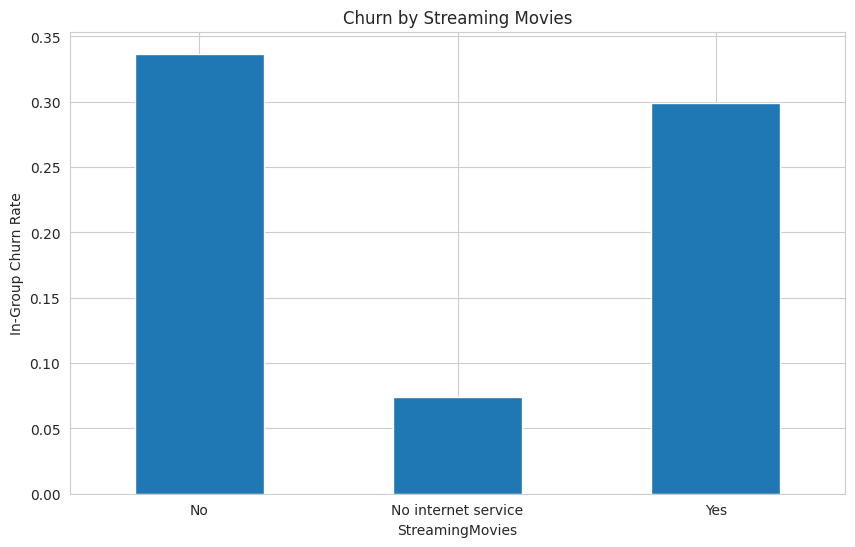

In [26]:
# Streaming movies and churn 
StreamingMovies_stats = group_churn(data, 'StreamingMovies') 
print(StreamingMovies_stats[['group_churn','population_share','population_churn_share']]) 
# Bar Plot 
ax = StreamingMovies_stats['group_churn'].plot(kind='bar') 
ax.set_ylabel('In-Group Churn Rate') 
ax.set_title('Churn by Streaming Movies') 
plt.xticks(rotation=0) 
# Saving figure 
#plt.savefig(visuals_path / 'churn_by_streaming_movies.png', dpi=150, bbox_inches='tight') 
plt.show()


                  group_churn  population_share  population_churn_share
PaperlessBilling                                                       
No                   0.163301          0.407781                0.066591
Yes                  0.335651          0.592219                0.198779


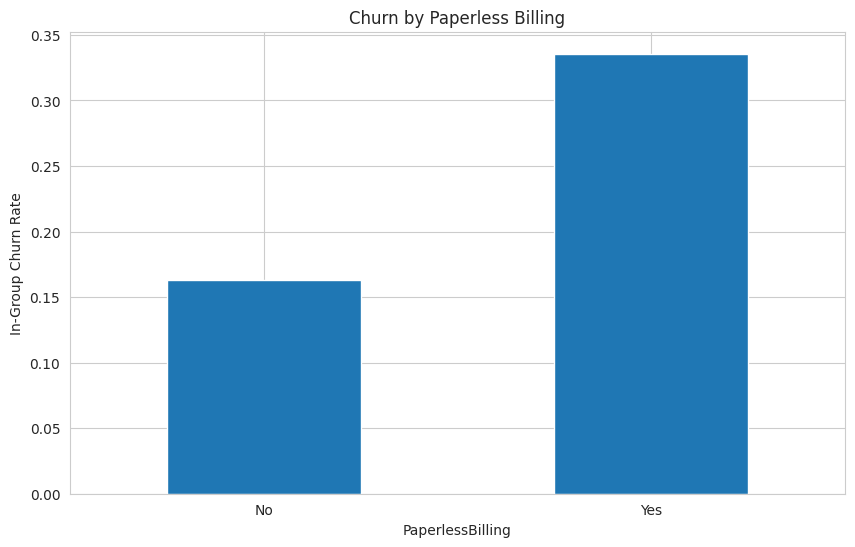

In [27]:
# Paperless billing and churn 
PaperlessBilling_stats = group_churn(data, 'PaperlessBilling') 
print(PaperlessBilling_stats[['group_churn','population_share','population_churn_share']]) 
# Bar Plot 
ax = PaperlessBilling_stats['group_churn'].plot(kind='bar') 
ax.set_ylabel('In-Group Churn Rate') 
ax.set_title('Churn by Paperless Billing') 
plt.xticks(rotation=0) 
# Saving figure 
#plt.savefig(visuals_path / 'churn_by_paperless_billing.png', dpi=150, bbox_inches='tight') 
plt.show()


                           group_churn  population_share  \
PaymentMethod                                              
Bank transfer (automatic)     0.167098          0.219225   
Credit card (automatic)       0.152431          0.216101   
Electronic check              0.452854          0.335794   
Mailed check                  0.191067          0.228880   

                           population_churn_share  
PaymentMethod                                      
Bank transfer (automatic)                0.036632  
Credit card (automatic)                  0.032941  
Electronic check                         0.152066  
Mailed check                             0.043731  


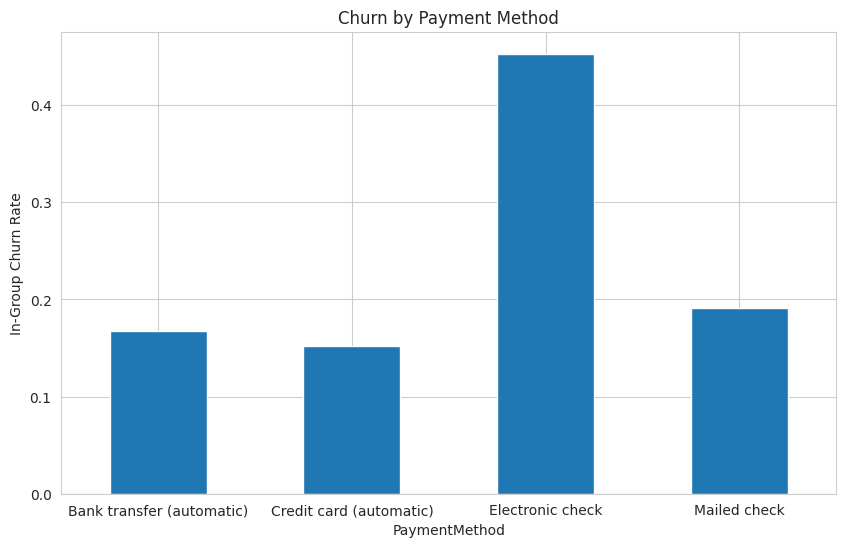

In [28]:
# Payment method and churn 
PaymentMethod_stats = group_churn(data, 'PaymentMethod') 
print(PaymentMethod_stats[['group_churn','population_share','population_churn_share']]) 
# Bar Plot 
ax = PaymentMethod_stats['group_churn'].plot(kind='bar') 
ax.set_ylabel('In-Group Churn Rate') 
ax.set_title('Churn by Payment Method') 
plt.xticks(rotation=0) 
# Saving figure 
#plt.savefig(visuals_path / 'churn_by_payment_method.png', dpi=150, bbox_inches='tight') 
plt.show()


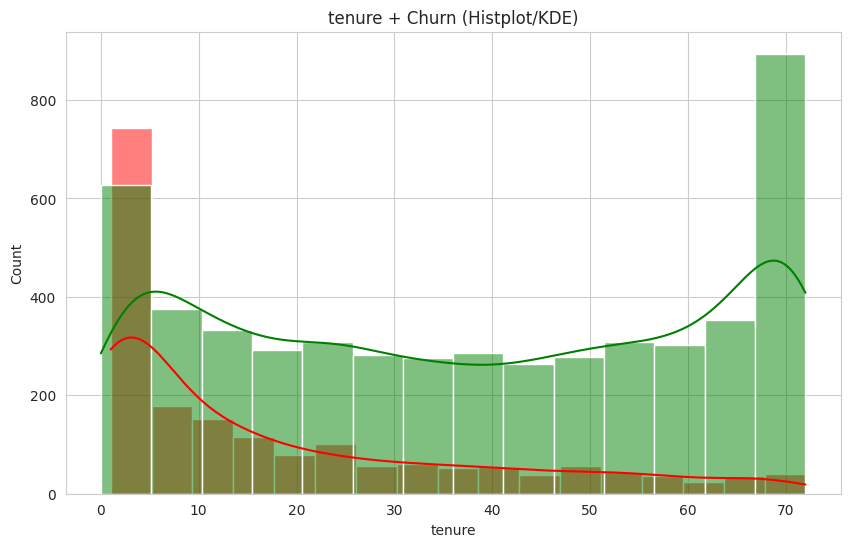

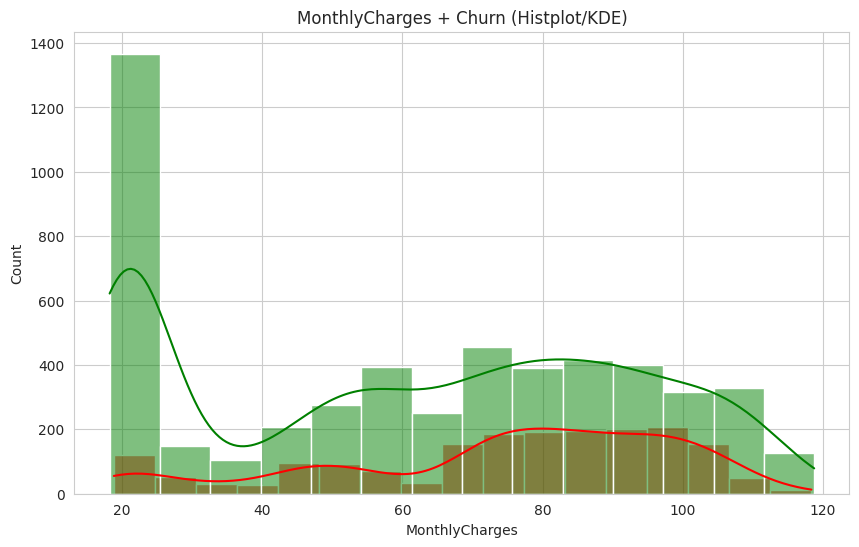

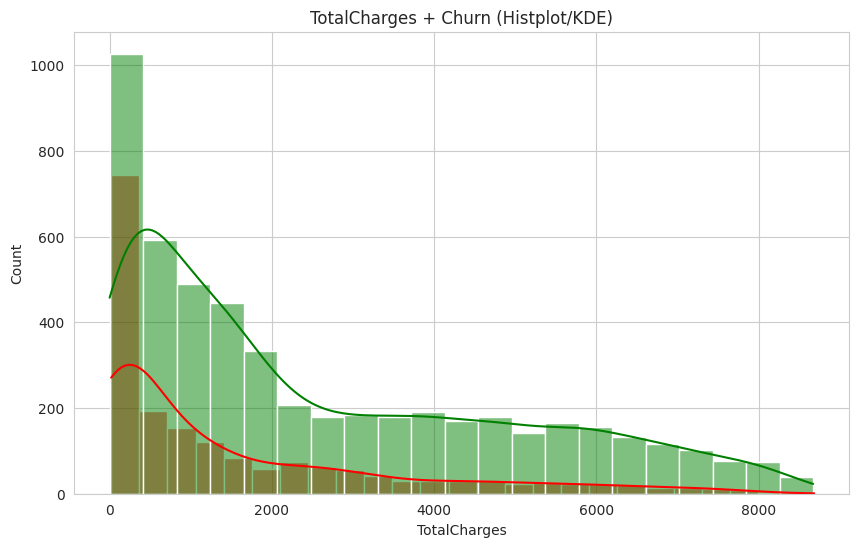

In [29]:
# Plotting Histplot and KDE for numerical columns (tenure, MonthlyCharges, TotalCharges) 
numeric_columns = ['tenure','MonthlyCharges','TotalCharges'] 
for col in numeric_columns: 
    sns.histplot(data[data['Churn'] == "Yes"][col], color='red', kde=True) 
    sns.histplot(data[data['Churn'] == "No"][col], color='green', kde=True) 
    plt.title(f"{col} + Churn (Histplot/KDE)")
    #plt.savefig(visuals_path / f'histplot_kde_{col}_by_churn.png', dpi=150, bbox_inches='tight')  
    plt.show()


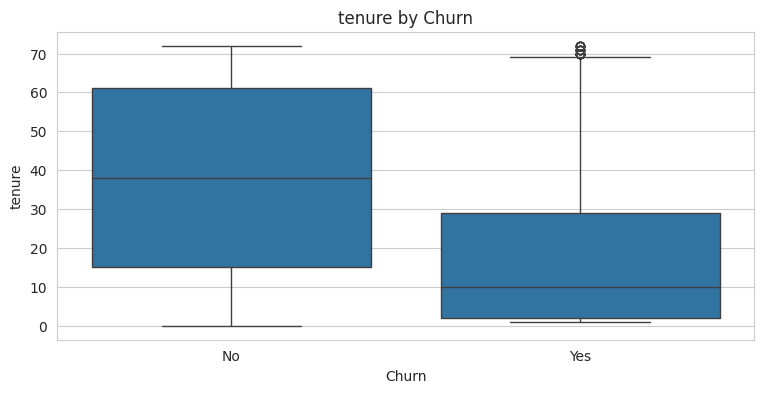

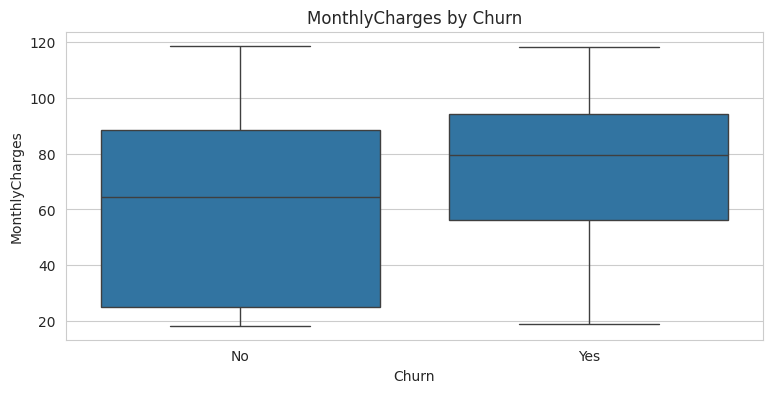

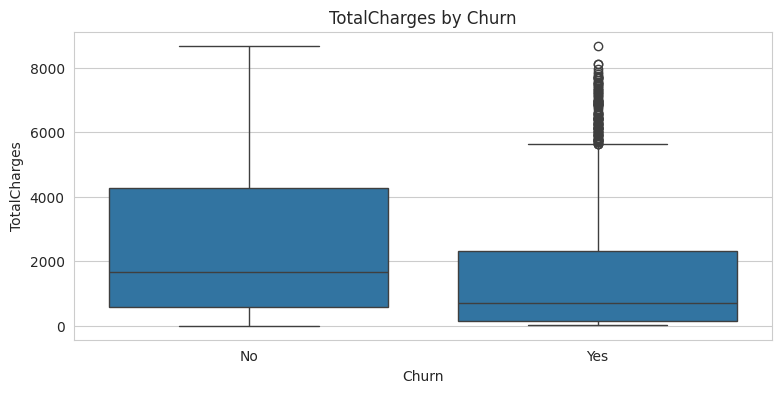

In [30]:
# Plotting boxplots for numerical columns (tenure, MonthlyCharges, TotalCharges) 
numeric_columns = ['tenure','MonthlyCharges','TotalCharges'] 
for col in numeric_columns: 
    plt.figure(figsize=(9,4)) 
    sns.boxplot(x='Churn', y=col, data=data) 
    plt.title(f'{col} by Churn') 
    #plt.savefig(visuals_path / f'boxplot_{col}_by_churn.png', dpi=150, bbox_inches='tight') 
    plt.show() 


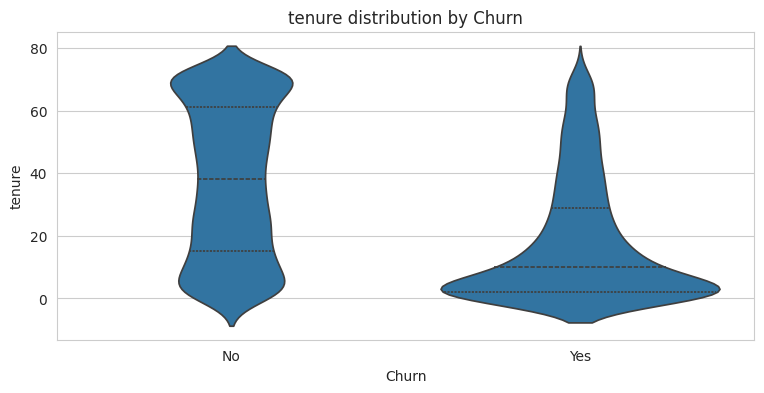

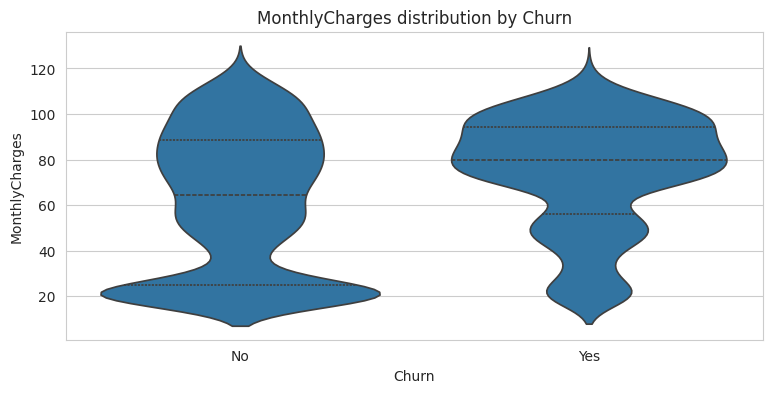

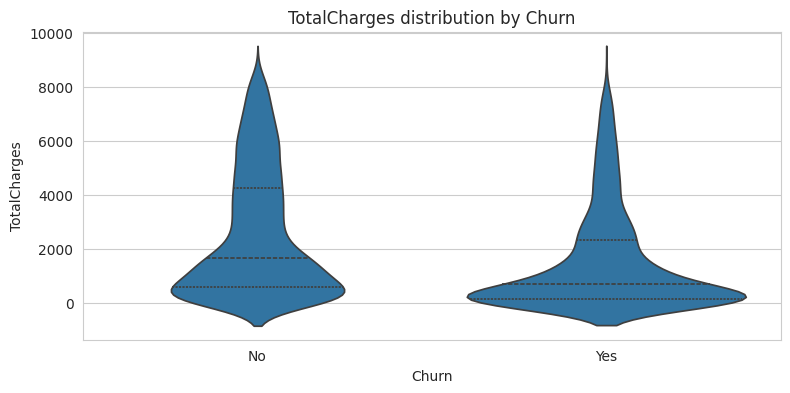

In [31]:
# Plotting violin plots for numerical columns (tenure, MonthlyCharges, TotalCharges) 
numeric_columns = ['tenure','MonthlyCharges','TotalCharges'] 
for col in numeric_columns: 
    plt.figure(figsize=(9,4)) 
    sns.violinplot(x='Churn', y=col, data=data, inner='quartile') 
    plt.title(f'{col} distribution by Churn') 
    #plt.savefig(visuals_path / f'violinplot_{col}_by_churn.png', dpi=150, bbox_inches='tight') 
    plt.show() 


In [32]:
# Encoding categorical variables for correlation analysis 
# Using target encoding to show mean churn rate (instead of label encoding) 
corr_df = data.copy() 
# Function to encode categorical variables (except customerID) 
def target_encoding(data, target_column, exclude_columns=None): 
    if exclude_columns is None: 
        exclude_columns = [] 

    encoded_df = data.copy() 
    # Encoding target variable (Churn) 
    if encoded_df[target_column].dtype == 'object': 
        unique_values = encoded_df[target_column].unique() 
        if len(unique_values) == 2: 
            mapping = {unique_values[0]: 0, unique_values[1]: 1} 
            encoded_df[target_column] = encoded_df[target_column].map(mapping) 

    # Encoding categorical variables (except customerID) 
    for col in encoded_df.select_dtypes(include='object').columns: 
        if col not in exclude_columns: 
            means = encoded_df.groupby(col)[target_column].mean() 
            encoded_df[col] = encoded_df[col].map(means) 

    return encoded_df 


encoded_df = target_encoding(corr_df, target_column='Churn', exclude_columns=['customerID']) 
# Dropping customerID column from encoded_df 
encoded_df = encoded_df.drop(columns=['customerID']) 
print(encoded_df.info()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   float64
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


In [33]:
# Correlation Matrix (by Churn) 
encoded_corr = encoded_df.corr()['Churn'].sort_values(ascending=False) 
encoded_corr 


Churn               1.000000
Contract            0.410116
OnlineSecurity      0.347400
TechSupport         0.342916
InternetService     0.322455
PaymentMethod       0.303359
OnlineBackup        0.292316
DeviceProtection    0.281580
StreamingMovies     0.230951
StreamingTV         0.230502
MonthlyCharges      0.193356
PaperlessBilling    0.191825
Dependents          0.164221
SeniorCitizen       0.150889
Partner             0.150448
MultipleLines       0.040109
PhoneService        0.011942
gender              0.008612
TotalCharges       -0.198324
tenure             -0.352229
Name: Churn, dtype: float64

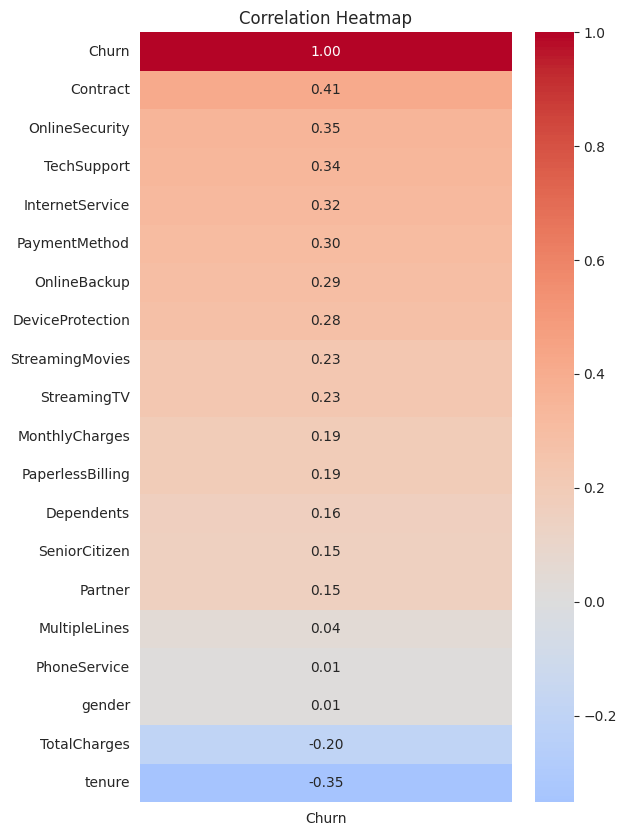

In [34]:
# Plotting heatmap of correlation matrix 
plt.figure(figsize=(6, 10)) 
sns.heatmap(encoded_corr.to_frame(), annot=True, fmt=".2f", cmap='coolwarm', center=0) 
plt.title("Correlation Heatmap") 
#plt.savefig(visuals_path / 'target_encoded_corr_matrix_target_grouping.png', dpi=150, bbox_inches='tight')
plt.show() 


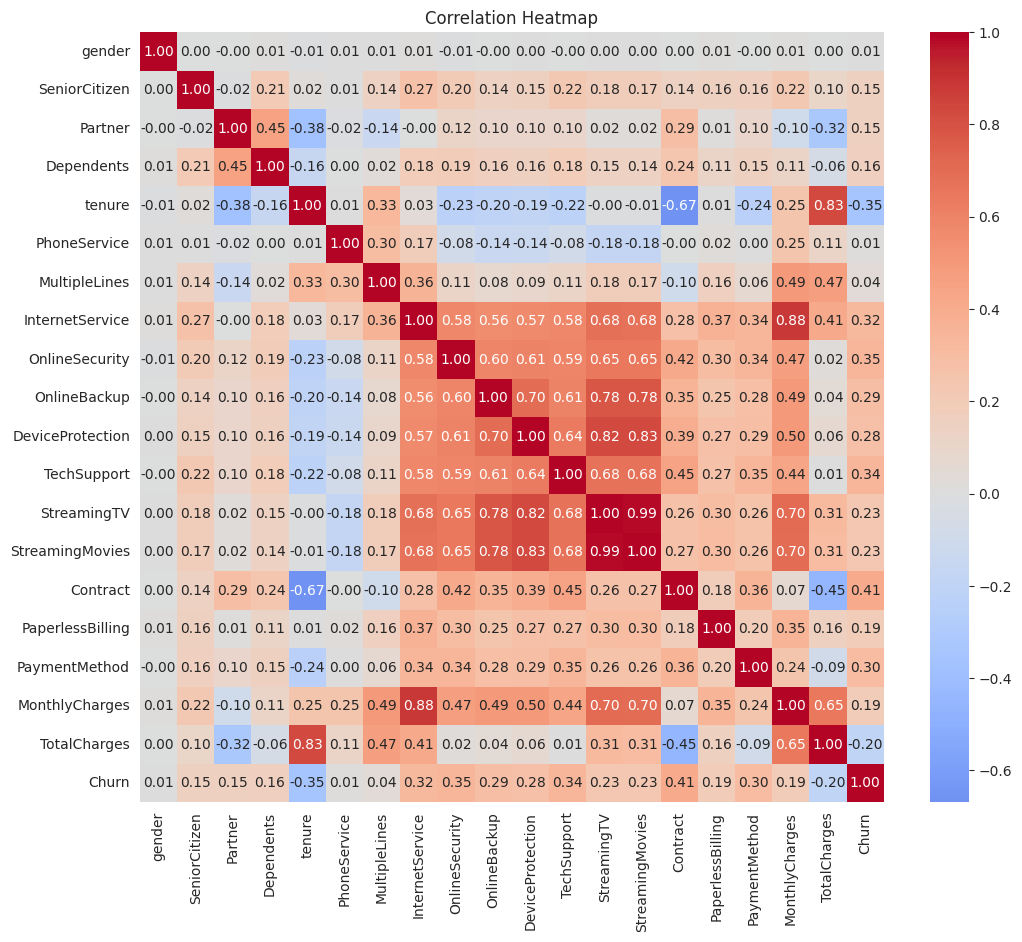

In [35]:
# Plotting full correlation matrix 
full_corr = encoded_df.corr() 
# Plotting heatmap of correlation matrix 
plt.figure(figsize=(12, 10)) 
sns.heatmap(full_corr, annot=True, fmt=".2f", cmap='coolwarm', center=0) 
plt.title("Correlation Heatmap") 
#plt.savefig(visuals_path / 'target_encoded_full_corr_matrix.png', dpi=150, bbox_inches='tight')
plt.show() 


In [37]:
# Encoding using different method 
corr_data = data.copy() 
# Mapping binary Yes/No (and some other categorical values) to numeric 
binary_mapping = {'Yes':1, 'No':0, 'No phone service':0, 'No internet service':0} 
columns_to_map = ['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity',
'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling'] 

for c in columns_to_map: 
    if c in corr_data.columns: 
        corr_data[c] = corr_data[c].map(binary_mapping).fillna(corr_data[c]) 

# Mapping 'Churn' 
corr_data['Churn'] = corr_data['Churn'].map({'Yes':1, 'No':0}) 

# Encoding other categorical strings ordinally 
ordinal_mapping = {
    'InternetService': {'No':0, 'DSL':1, 'Fiber optic':2}, 
    'Contract': {'Month-to-month':0, 'One year':1, 'Two year':2}, 
    'PaymentMethod': {'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3}
}

for c, m in ordinal_mapping.items(): 
    if c in corr_data.columns: 
        corr_data[c] = corr_data[c].map(m) 


In [38]:
corr_matrix = corr_data.select_dtypes(include=[np.number]).corr() 
corr_matrix 


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,0.259390,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.093704,0.220173,0.103006,0.150889
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,-0.000132,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,0.133115,0.096848,0.317504,-0.150448
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,-0.179631,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,0.123844,-0.113890,0.062078,-0.164221
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.033230,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,0.340305,0.247900,0.826178,-0.352229
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.093720,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004070,0.247398,0.113214,0.011942
MultipleLines,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.344684,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,0.035851,0.490434,0.468504,0.040102
InternetService,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.344684,1.000000,0.156799,0.307420,0.313603,0.164833,0.429707,0.427264,-0.290189,0.378108,-0.178137,0.905491,0.428963,0.316846
OnlineSecurity,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,0.156799,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,0.163367,0.296594,0.411651,-0.171226
OnlineBackup,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.307420,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,0.096550,0.441780,0.509226,-0.082255
DeviceProtection,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.313603,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.219310,0.103797,0.111241,0.482692,0.521983,-0.066160


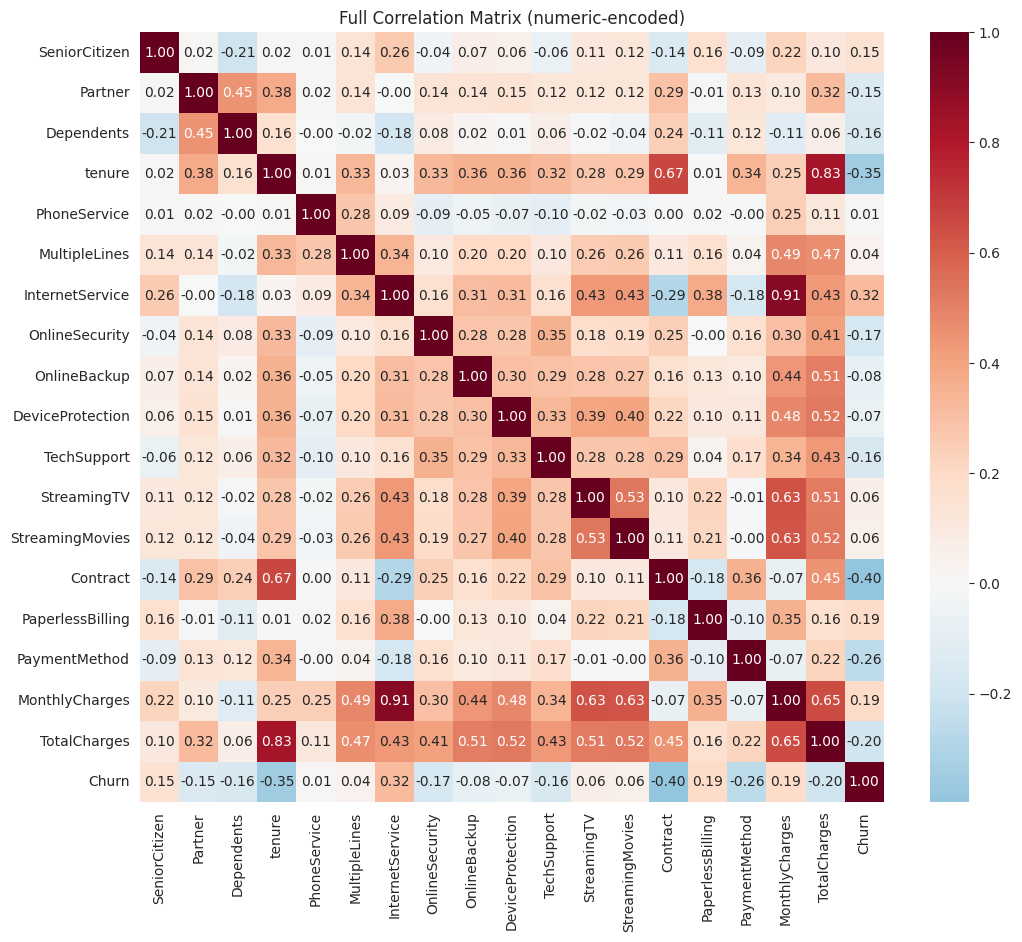

In [39]:
# Plotting correlation heatmap 
plt.figure(figsize=(12, 10)) 
sns.heatmap(corr_matrix, cmap='RdBu_r', center=0, annot=True, fmt=".2f") 
plt.title('Full Correlation Matrix (numeric-encoded)') 
#plt.savefig(visuals_path / 'numeric_encoded_full_corr_matrix.png', dpi=150, bbox_inches='tight')
plt.show() 


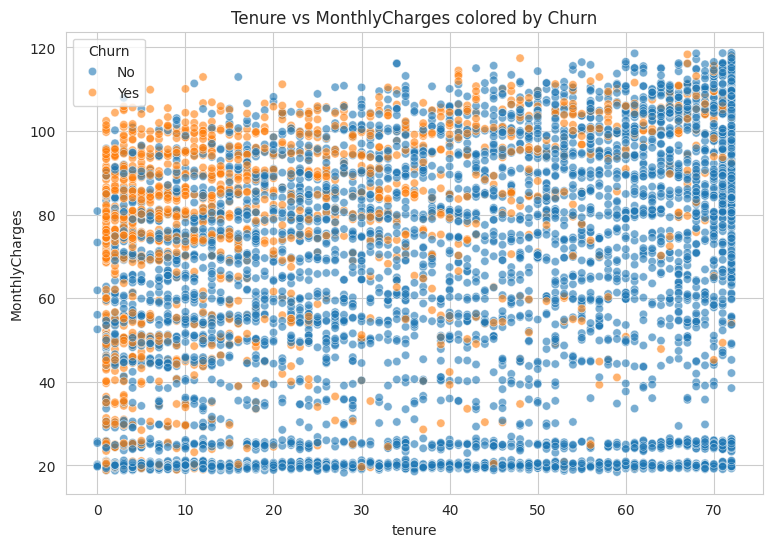

In [40]:
# Plotting interaction (tenure vs MonthlyCharges) colored by Churn 
plt.figure(figsize=(9,6)) 
# Using alpha so dense regions are shown 
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=data, alpha=0.6) 
plt.title("Tenure vs MonthlyCharges colored by Churn") 
#plt.savefig(visuals_path / 'tenure_vs_monthlycharges_churn.png', dpi=150, bbox_inches='tight')
plt.show()
